In [9]:
import tensorflow as tf
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_dataset = '/home/priyam/Downloads/archive/train'
val_dataset = '/home/priyam/Downloads/archive/test'
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_directory(
                    train_dataset,
                    target_size=(48, 48),
                    batch_size=32,
                    class_mode='categorical',
                    color_mode = "grayscale")
val_generator = val_gen.flow_from_directory(
                    val_dataset,
                    target_size=(48, 48),
                    batch_size=32,
                    class_mode='categorical',
                    color_mode = "grayscale")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [13]:
history = model.fit_generator(train_generator, validation_data=val_generator, epochs=50)

/tmp/ipykernel_712770/4263074362.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data=val_generator, epochs=50)


Epoch 1/50
  1/898 [..............................] - ETA: 8:48 - loss: 1.9827 - accuracy: 0.0938

2022-11-07 09:09:13.857186: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15859712 exceeds 10% of free system memory.
2022-11-07 09:09:13.920204: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21196800 exceeds 10% of free system memory.
2022-11-07 09:09:13.920266: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21196800 exceeds 10% of free system memory.
2022-11-07 09:09:13.943584: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15859712 exceeds 10% of free system memory.
2022-11-07 09:09:13.959882: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26763264 exceeds 10% of free system memory.


898/898 [==============================] - 147s 164ms/step - loss: 1.7721 - accuracy: 0.2781 - val_loss: 1.6369 - val_accuracy: 0.3814
Epoch 2/50
898/898 [==============================] - 144s 160ms/step - loss: 1.5862 - accuracy: 0.3878 - val_loss: 1.5027 - val_accuracy: 0.4207
Epoch 3/50
898/898 [==============================] - 130s 145ms/step - loss: 1.4870 - accuracy: 0.4284 - val_loss: 1.4202 - val_accuracy: 0.4597
Epoch 4/50
898/898 [==============================] - 135s 150ms/step - loss: 1.4101 - accuracy: 0.4636 - val_loss: 1.3743 - val_accuracy: 0.4751
Epoch 5/50
898/898 [==============================] - 140s 156ms/step - loss: 1.3522 - accuracy: 0.4844 - val_loss: 1.3169 - val_accuracy: 0.4997
Epoch 6/50
898/898 [==============================] - 138s 154ms/step - loss: 1.2957 - accuracy: 0.5082 - val_loss: 1.2597 - val_accuracy: 0.5228
Epoch 7/50
898/898 [==============================] - 151s 169ms/step - loss: 1.2500 - accuracy: 0.5329 - val_loss: 1.2253 - val_accura

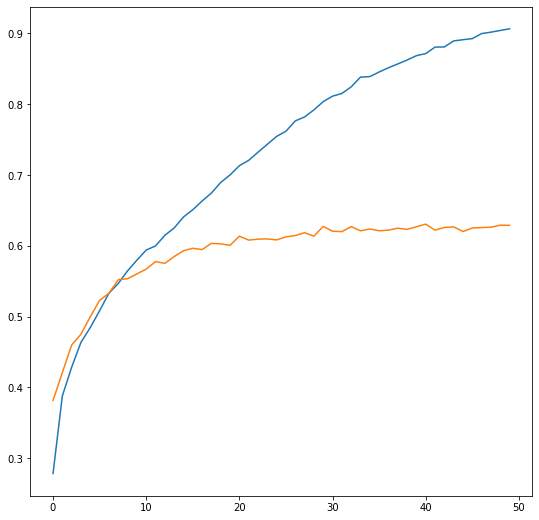

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [16]:
model.save('emoji_model.h5')

In [17]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}